In [49]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy.optimize import line_search

In [50]:
def rosenbrock(x, a=1, b=5):
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


class GradientDescent:
    def __init__(self, alpha, f, x0):
        self.alpha = alpha
        self.f = f
        self.x = x0

    def step(self, x):
        return x - self.alpha * nd.Gradient(self.f)(x)


class AdaGrad:
    def __init__(self, alpha, f, x0):
        self.alpha = alpha
        self.f = f
        self.x = x0
        self.s = np.zeros_like(x0)
        self.eps = 1e-8

    def step(self, x):
        g = nd.Gradient(self.f)(x)
        self.s = self.s + np.dot(g, g)
        return x - self.alpha * g / (np.sqrt(self.s) + self.eps)


class Momentum:
    def __init__(self, alpha, beta, f, x0):
        self.alpha = alpha
        self.beta = beta
        self.f = f
        self.x = x0
        self.v = np.zeros_like(x0)

    def step(self, x):
        self.v = self.beta * self.v - self.alpha * nd.Gradient(self.f)(x)
        return x + self.v


class Newton:
    def __init__(self, f):
        self.f = f

    def step(self, x):
        g = nd.Gradient(self.f)(x)
        H = nd.Hessian(self.f)(x)
        return x - np.dot(np.linalg.inv(H), g)


class BFGS:
    def __init__(self, f, x0):
        self.f = f
        self.grad = nd.Gradient(self.f)
        self.Q = np.identity(len(x0))

    def step(self, x):
        g = nd.Gradient(self.f)(x)
        alpha, _, _, _, _, _,  = line_search(self.f, self.grad, x, np.dot(-self.Q, g))
        print("alpha: ", alpha)
        print("x: ", x)
        x_prime = x - alpha*x
        
        print("x_prime: ", x_prime)
        g_prime = nd.Gradient(self.f)(x_prime)
        delta = x_prime - x
        gamma = g_prime - g
        gammaT = np.transpose(gamma)
        deltaT = np.transpose(delta)
        self.Q = (
            self.Q
            - (
                np.dot(np.dot(delta, gammaT), self.Q)
                + np.dot(self.Q, np.dot(gamma, deltaT))
            )
            / np.dot(deltaT, gamma)
            + (1 + np.dot(gammaT, np.dot(self.Q, gamma)) / np.dot(deltaT, gamma))
            * (np.dot(delta, deltaT) / np.dot(deltaT, gamma))
        )
        return x_prime

alpha:  0.062281925492218455
x:  [-1.  -0.5]
x_prime:  [-0.93771807 -0.46885904]
alpha:  0.0302490029696119
x:  [-0.93771807 -0.46885904]
x_prime:  [-0.90935304 -0.45467652]
alpha:  0.11078035688998786
x:  [-0.90935304 -0.45467652]
x_prime:  [-0.80861458 -0.40430729]
alpha:  0.05570465518264942
x:  [-0.80861458 -0.40430729]
x_prime:  [-0.76357099 -0.38178549]
alpha:  0.13771785187022015
x:  [-0.76357099 -0.38178549]
x_prime:  [-0.65841363 -0.32920682]
alpha:  0.1446307313263296
x:  [-0.65841363 -0.32920682]
x_prime:  [-0.56318679 -0.28159339]
alpha:  0.2700039387589933
x:  [-0.56318679 -0.28159339]
x_prime:  [-0.41112414 -0.20556207]
alpha:  0.1591929307191739
x:  [-0.41112414 -0.20556207]
x_prime:  [-0.34567608 -0.17283804]
alpha:  0.41376675054499346
x:  [-0.34567608 -0.17283804]
x_prime:  [-0.20264681 -0.10132341]
alpha:  0.10522214367180162
x:  [-0.20264681 -0.10132341]
x_prime:  [-0.18132388 -0.09066194]
alpha:  0.2980115268937741
x:  [-0.18132388 -0.09066194]
x_prime:  [-0.127287

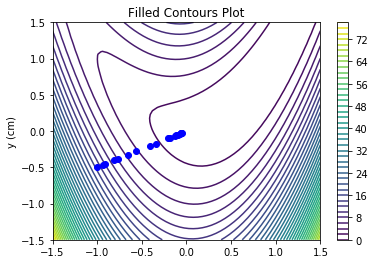

In [51]:
X, Y = np.meshgrid(np.linspace(-1.5, 1.5, 60), np.linspace(-1.5, 1.5, 60))

x = np.array([X, Y])

Z = rosenbrock(x)

x0 = np.array([-1.0, -0.5])

#opt = GradientDescent(0.03, rosenbrock, x0)

#opt = Momentum(0.03, 0.1, rosenbrock, x0)

#opt = AdaGrad(0.8, rosenbrock, x0)

#opt = Newton(rosenbrock)
opt = BFGS(rosenbrock, x0)

fig,ax=plt.subplots(1,1)
cp = ax.contour(x[0], x[1], Z, 50)
x_c = x0
eps = 0.001
for i in range(50):
    ax.plot(x_c[0], x_c[1], 'bo')
    x_new = opt.step(x_c)
    if np.linalg.norm(x_new-x_c) < eps:
        print("Terminate optimization on {} iteration".format(i))
        break 
    x_c = x_new
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()